#### Importing notebooks

In [1]:
%%capture
%run '01_Getting_Data.ipynb'

In [2]:
#get data
bitcoin_bubble = pandas.read_csv("data/bitcoin_bubble_google_trends.csv", ',')

bitcoin_bubble = bitcoin_bubble.iloc[1:]
bitcoin_bubble.columns = ['search_volume_for_bitcoin_bubble']
bitcoin_bubble['search_volume_for_bitcoin_bubble'] = bitcoin_bubble['search_volume_for_bitcoin_bubble'].apply(pandas.to_numeric)

bitcoin_bubble.index.names = ['date']
bitcoin_bubble.index = bitcoin_bubble.index + "-15"
bitcoin_bubble.index = pandas.to_datetime(bitcoin_bubble.index, format="%Y-%m-%d")

In [10]:
btc_usd = pandas.read_csv("data/btc_usd_google_trends.csv", ',')

btc_usd = btc_usd.iloc[1:]
btc_usd.columns = ['btc_usd']
btc_usd['btc_usd'] = btc_usd['btc_usd'].apply(pandas.to_numeric)

btc_usd.index.names = ['date']
btc_usd
btc_usd.index = btc_usd.index + "-15"
btc_usd.index = pandas.to_datetime(btc_usd.index, format="%Y-%m-%d")

In [39]:
dummy = pandas.concat([bitcoin_bubble, bpi, btc_usd], axis=1)

dummy.search_volume_for_bitcoin_bubble = dummy.search_volume_for_bitcoin_bubble.interpolate(method='linear', axis=0).ffill().bfill()

dummy.btc_usd = dummy.btc_usd.interpolate(method='linear', axis=0).ffill().bfill()

dummy['log_returns_bitcoin_price'] = numpy.log(dummy.bitcoin_price) - numpy.log(dummy.bitcoin_price.shift(1))
dummy['total_returns_bitcoin_price'] = numpy.exp(dummy.log_returns_bitcoin_price.cumsum()) - 1

dummy['log_returns_btc_usd'] = numpy.log(dummy.btc_usd.iloc[657:]) - numpy.log(dummy.btc_usd.iloc[657:].shift(1))
dummy['total_returns_btc_usd'] = numpy.exp(dummy.log_returns_btc_usd.cumsum()) - 1

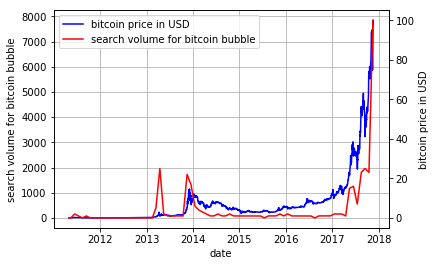

In [47]:
#plot data
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(dummy.index, dummy.bitcoin_price, label = bitcoin_title, color ='b')
ax2 = ax.twinx()
lns2 = ax2.plot(dummy.index, dummy.search_volume_for_bitcoin_bubble, label = 'search volume for bitcoin bubble', color = 'r')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel('search volume for bitcoin bubble')
ax2.set_ylabel(bitcoin_title)